In [19]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('dataset.csv', index_col = 0)
df.head()

,id,petitions,classes,classes_numeric
0,0855102-81.2017.8.20.5001_0dcdbe05606fafe50c8d...,Excelentíssimo Senhor Doutor Juiz de Direito d...,inss,9
1,0831378-19.2015.8.20.5001_aa4b3daa69c12445a3e0...,...,inss,9
2,0811981-37.2016.8.20.5001_6061bf49c7499380af5a...,Advocacia...,inss,9
3,0829852-46.2017.8.20.5001_6455022b51dc0ca6104c...,Alves & Cas...,inss,9
4,0835750-40.2017.8.20.5001_b1b83393e6b72c6cf200...,EXCELENTÍSSIMO(A) SENHOR(A) DOUTOR(A) JUIZ(A) ...,inss,9


In [5]:
df = df[['id', 'classes', 'petitions', 'classes_numeric']]
df.head()

,id,classes,petitions,classes_numeric
0,0855102-81.2017.8.20.5001_0dcdbe05606fafe50c8d...,inss,Excelentíssimo Senhor Doutor Juiz de Direito d...,9
1,0831378-19.2015.8.20.5001_aa4b3daa69c12445a3e0...,inss,...,9
2,0811981-37.2016.8.20.5001_6061bf49c7499380af5a...,inss,Advocacia...,9
3,0829852-46.2017.8.20.5001_6455022b51dc0ca6104c...,inss,Alves & Cas...,9
4,0835750-40.2017.8.20.5001_b1b83393e6b72c6cf200...,inss,EXCELENTÍSSIMO(A) SENHOR(A) DOUTOR(A) JUIZ(A) ...,9


In [8]:
col = ['classes', 'petitions']
df = df[col]
df = df[pd.notnull(df['petitions'])]
df.columns = ['classes', 'petitions']
df['category_id'] = df['classes'].factorize()[0]
category_id_df = df[['classes', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'classes']].values)
df.head()

,classes,petitions,category_id
0,inss,Excelentíssimo Senhor Doutor Juiz de Direito d...,0
1,inss,...,0
2,inss,Advocacia...,0
3,inss,Alves & Cas...,0
4,inss,EXCELENTÍSSIMO(A) SENHOR(A) DOUTOR(A) JUIZ(A) ...,0


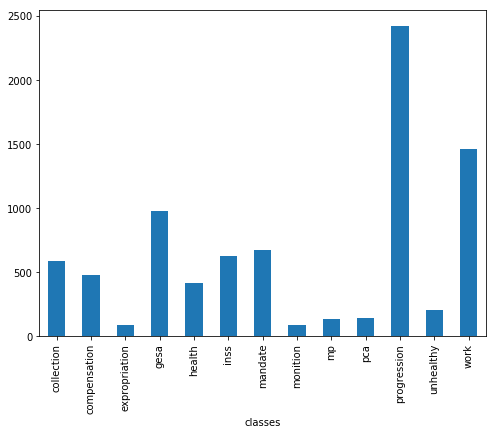

In [18]:
fig = plt.figure(figsize=(8,6))
df.groupby('classes').petitions.count().plot.bar(ylim=0)
plt.show()

In [48]:
import csv

my_stop_words = []
with open('stopwords.txt', newline='') as inputfile:
    for row in csv.reader(inputfile):
        my_stop_words.append(row[0])

In [49]:
from sklearn.feature_extraction import text
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words=my_stop_words)
features = tfidf.fit_transform(df['petitions'])
labels = df.category_id
features.shape

(8315, 264745)

In [50]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for classes, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(classes))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'collection':
  . Most correlated unigrams:
. aderval
. ___________________________________________________
  . Most correlated bigrams:
. ___________________________________________________ josé
. 3º 308
# 'compensation':
  . Most correlated unigrams:
. honra
. vítima
  . Most correlated bigrams:
. indenização material
. teoria risco
# 'expropriation':
  . Most correlated unigrams:
. desapropriação
. imissão
  . Most correlated bigrams:
. provisória posse
. imissão provisória
# 'gesa':
  . Most correlated unigrams:
. 206
. gesa
  . Most correlated bigrams:
. exercício aula
. 206 2001
# 'health':
  . Most correlated unigrams:
. sus
. fornecimento
  . Most correlated bigrams:
. acesso universal
. ações serviços
# 'inss':
  . Most correlated unigrams:
. inss
. auxílio
  . Most correlated bigrams:
. auxílio acidente
. auxílio doença
# 'mandate':
  . Most correlated unigrams:
. coatora
. impetrante
  . Most correlated bigrams:
. 12 016
. autoridade coatora
# 'monition':
  . Most correlat

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['petitions'], df['classes'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

/home/alexis/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


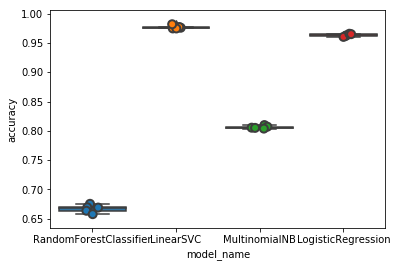

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [52]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.976914
LogisticRegression        0.963202
MultinomialNB             0.806250
RandomForestClassifier    0.667096
Name: accuracy, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

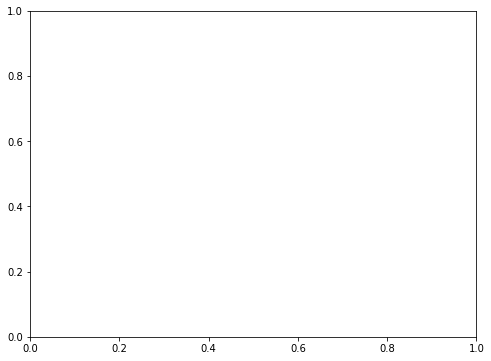

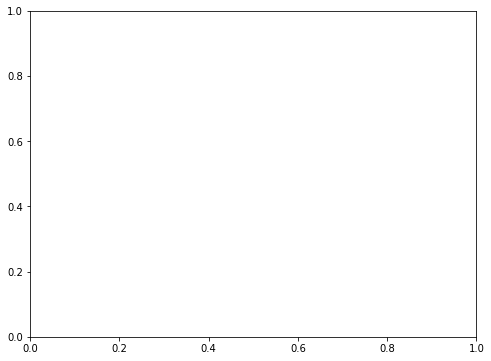

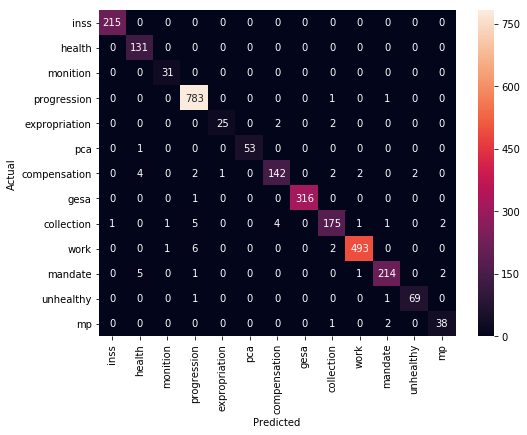

In [56]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.classes.values, yticklabels=category_id_df.classes.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [58]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 5:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['classes', 'petitions']])
      print('')

'mandate' predicted as 'health' : 5 examples.


,classes,petitions
443,inss,...
443,progression,Excelentíssimo(a) Senhor(a) Juiz(a) de Direito...
443,compensation,Mylena Fernandes Leite\n\nOAB/RN 9860\n\n ...
443,gesa,EXCELENTÍSSIMO(A) SENHOR(A) DOUTOR(A) JUIZ(A) ...
443,collection,EXCELENTÍSSIMO (A) SENHOR (A) DOUTOR (A) JUIZ ...
443,work,Excelentíssimo(a) Senhor(a) Juiz(a) de Direito...
443,mandate,...
545,inss,...
545,progression,Mylena Fernandes Leite\n\nOAB/RN 9860\n\n ...
545,gesa,EXCELENTÍSSIMO(A) SENHOR(A) DOUTOR(A) JUIZ(A) ...



'collection' predicted as 'progression' : 5 examples.


,classes,petitions
112,inss,...
112,health,DEFENSORIA PÚBLICA DO ESTADO...
112,progression,EXCELENTÍSSIMO SENHOR(A) JUIZ(A) DE DIREITO DE...
112,pca,PROMOTORIA DE JUSTIÇA DE DEFESA DO...
112,compensation,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ DE DIREITO D...
112,gesa,Excelentíssimo(a) Senhor(a) Juiz(a) de Direito...
112,collection,ADVOCACIA E CONSULT...
112,work,Excelentíssimo(a) Senhor(a) Juiz(a) de Direito...
112,mandate,EXCELENTÍSSIMO (A) SENHOR (A) DOUTOR (A) JUIZ ...
112,unhealthy,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ DE DIREITO D...



'work' predicted as 'progression' : 6 examples.


,classes,petitions
1423,progression,EXCELENTÍSSIMO SENHOR(A) DOUTOR(A) JUIZ(A) DE ...
1423,work,EXCELENTÍSSIMO SENHOR(A) JUIZ(A) DE DIREITO DE...
131,inss,Excelentíssimo Senhor Doutor Juiz de Direito d...
131,health,EXCELENTÍSSIMO SENHOR DOUTOR JUIZ DE DIREITO D...
131,progression,Welith...
131,pca,MINISTÉRIO PÚBLICO D...
131,compensation,EXCELENTÍSSIMO (A) SENHOR (A) DOUTOR (A) JUIZ ...
131,gesa,Excelentíssimo(a) Senhor(a) Juiz(a) de Direito...
131,collection,ESCRITORIO DE ADVOCACIA\n\n...
131,work,AN...


In [59]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'collection':
  . Top unigrams:
       . cobrança
       . período
  . Top bigrams:
       . ação cobrança
       . ordinária cobrança
# 'compensation':
  . Top unigrams:
       . indenização
       . vítima
  . Top bigrams:
       . ação indenização
       . indenização materiais
# 'expropriation':
  . Top unigrams:
       . desapropriação
       . imissão
  . Top bigrams:
       . ação desapropriação
       . imissão provisória
# 'gesa':
  . Top unigrams:
       . gesa
       . 206
  . Top bigrams:
       . 206 2001
       . exercício aula
# 'health':
  . Top unigrams:
       . medicamento
       . fornecimento
  . Top bigrams:
       . 196 constituição
       . fornecimento medicamento
# 'inss':
  . Top unigrams:
       . auxílio
       . inss
  . Top bigrams:
       . auxílio doença
       . lei 213
# 'mandate':
  . Top unigrams:
       . impetrante
       . coatora
  . Top bigrams:
       . autoridade coatora
       . 12 016
# 'monition':
  . Top unigrams:
       . monitória
   

In [60]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['classes'].unique()))

               precision    recall  f1-score   support

         inss       1.00      1.00      1.00       215
       health       0.93      1.00      0.96       131
     monition       0.94      1.00      0.97        31
  progression       0.98      1.00      0.99       785
expropriation       0.96      0.86      0.91        29
          pca       1.00      0.98      0.99        54
 compensation       0.96      0.92      0.94       155
         gesa       1.00      1.00      1.00       317
   collection       0.96      0.92      0.94       190
         work       0.99      0.98      0.99       502
      mandate       0.98      0.96      0.97       223
    unhealthy       0.97      0.97      0.97        71
           mp       0.90      0.93      0.92        41

  avg / total       0.98      0.98      0.98      2744

